In which order are transforms called within a compose?

In [1]:
import torch
from torchvision import transforms as T

In [2]:
square = T.Lambda(lambda x : x**2)
add_one = T.Lambda(lambda x : x + 1)

In [3]:
order_a = T.Compose([square, add_one])
order_b = T.Compose([add_one, square])

In [4]:
x = torch.tensor(1)

In [5]:
print(order_a(x))

tensor(2)


In [6]:
print(order_b(x))

tensor(4)


The transforms with lower indices are called first on the input to the resulting transform. Is it the same with nn.Sequential?

In [7]:
from torch import nn
from PIL import Image
import os

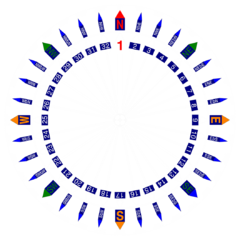

In [8]:
# Image credit Wikimedia Commons:
# https://en.wikipedia.org/wiki/File:Compass.png
image = Image.open(
    os.path.join(os.path.abspath(""), "imgs", "compass.png")
)
image

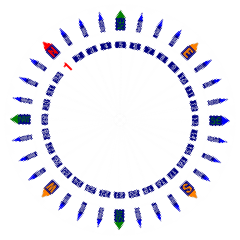

In [9]:
rotate = T.RandomRotation((44,46))
flip = T.RandomHorizontalFlip(1.0)
#Establish rotation direction
rotate(image)

In [10]:
img_order_a = nn.Sequential(rotate, flip)
img_order_b = nn.Sequential(flip, rotate)

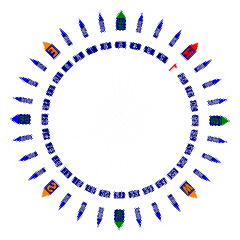

In [11]:
img_order_a(image)

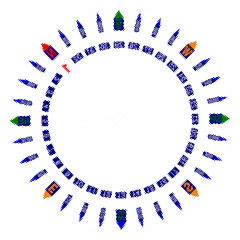

In [12]:
img_order_b(image)

In [13]:
image.close()

As before, the transforms with lower indices that appear first when supplied to nn.Sequential are applied first.